In [74]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d



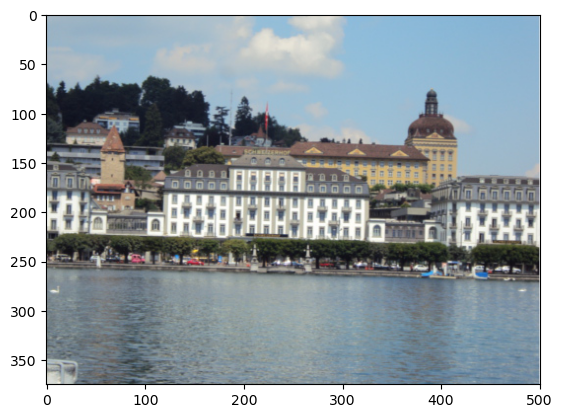

In [47]:
img = Image.open("Docs - Primitives-20230926\pics\P1.JPG")

plt.imshow(img)
plt.show()

In [48]:
img_arr = np.array(img)
img_arr.shape

(375, 501, 3)

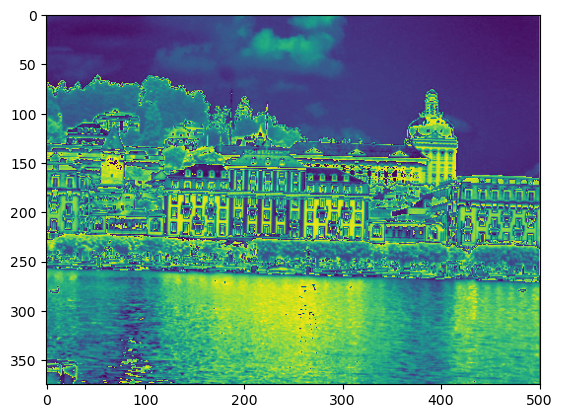

In [85]:
Amp = 1
img_gs = (img_arr[:,:,0] + img_arr[:,:,1] + img_arr[:,:,2]) * Amp /3 
plt.imshow(img_gs)

In [86]:
def gradient(img, axis):
    if axis == 1:
        grad = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    else:
        grad = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    # Apply convolution with the gradient kernel
    out = np.zeros_like(img)    
    out = convolve2d(img, grad, mode='same', boundary='wrap')

    return out
    

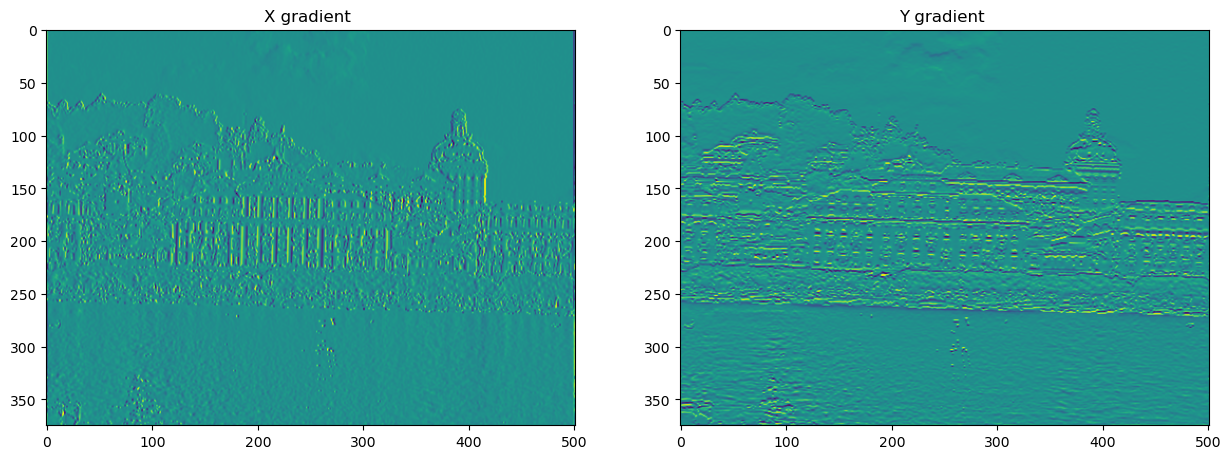

In [87]:
xgrad_img = gradient(img_gs, 0)
ygrad_img = gradient(img_gs, 1)

plt.figure(figsize=(15, 10))

# X gradient 
plt.subplot(1,2,1)
plt.imshow(xgrad_img)
plt.title("X gradient ")

# Y gradient 
plt.subplot(1,2,2)
plt.imshow(ygrad_img)
plt.title("Y gradient ")

plt.show()

In [127]:
k = 0.04
L = 0.01
def Harris(img, Xgrad, Ygrad) :
    out = np.zeros_like(img)

    for i in range(len(img[:,1])) :
        for j in range(len(img[1,:])):
            
            if i == 0 or j == 0 or j == len(img[1,:])-1 or i == len(img[:,1])-1:
                out[i,j] = 0
            else : 
                
                M = np.array([[Xgrad[i,j]**2, Xgrad[i,j]*Ygrad[i,j]],[Xgrad[i,j]*Ygrad[i,j],Xgrad[i,j]**2]])
                det_M = np.linalg.det(M)
                trace_M = np.trace(M)
                C = det_M - k * (trace_M ** 2)
                out[i,j] = C
    
    out[out > L * out.max()] = 255
    out[out <= L * out.max()] = 0
    return out
    

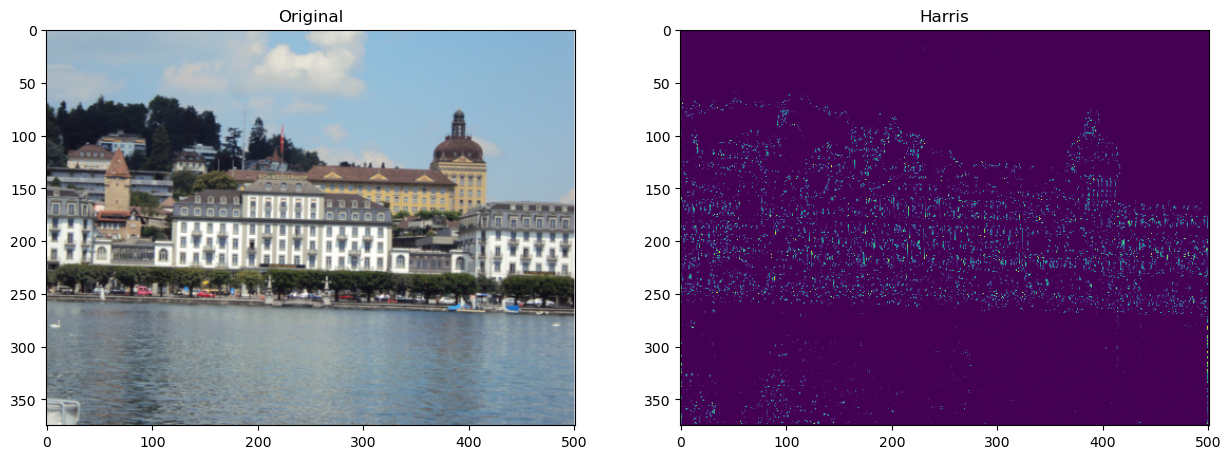

In [128]:
har_img = Harris(img_gs, xgrad_img, ygrad_img)

plt.figure(figsize=(15, 10))

# X gradient 
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")

# Y gradient 
plt.subplot(1,2,2)
plt.imshow(har_img)
plt.title("Harris")

plt.show()


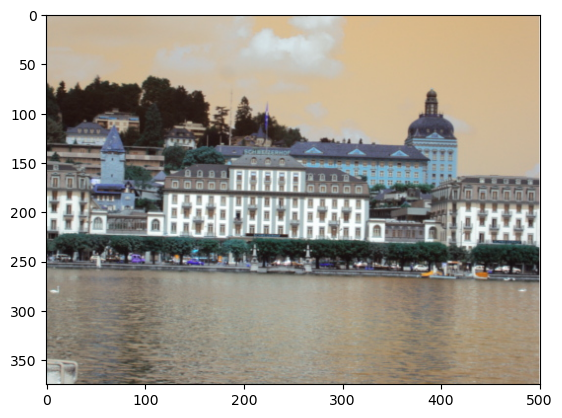

In [133]:
import cv2
import numpy as np

# Load an image
image = cv2.imread("Docs - Primitives-20230926\pics\P1.JPG")  # Replace "example.jpg" with your image file's path

# Convert the image to grayscale (Harris detector works on grayscale images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Harris Corner Detection
dst = cv2.cornerHarris(gray, blockSize=1, ksize=3, k=0.04)

# Threshold the corner response to identify significant corners
threshold = 0.01 * dst.max()
corner_image = np.copy(image)
corner_image[dst > threshold] = [255, 0, 0]  # Mark corners in red

# Display the corners on the original image
plt.imshow(corner_image)

In [135]:
def harris_corner_detector(image, threshold=0.01, window_size=3, k=0.04):
    # Convert the image to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Compute gradients using Sobel operators
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    height, width = gray.shape
    corner_response = np.zeros((height, width))

    offset = window_size // 2

    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            # Compute the structure tensor M for the current pixel
            M = np.zeros((2, 2))
            for i in range(-offset, offset + 1):
                for j in range(-offset, offset + 1):
                    Ix_val = Ix[y + i, x + j]
                    Iy_val = Iy[y + i, x + j]
                    M[0, 0] += Ix_val ** 2
                    M[0, 1] += Ix_val * Iy_val
                    M[1, 0] += Ix_val * Iy_val
                    M[1, 1] += Iy_val ** 2

            # Compute the corner response using the Harris formula
            det_M = np.linalg.det(M)
            trace_M = np.trace(M)
            corner_response[y, x] = det_M - k * (trace_M ** 2)

    # Threshold the corner response to identify significant corners
    corners = np.zeros_like(image)
    corners[corner_response > threshold * corner_response.max()] = [0, 0, 255]  # Mark corners in red

    return corners

# Load an image
image = cv2.imread("example.jpg")  # Replace "example.jpg" with your image file's path

# Detect corners using the Harris Corner Detector
corner_image = harris_corner_detector(img)

# Display the corners on the original image
cv2.imshow("Harris Corners", corner_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: shape